In [83]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
combined_df = pd.read_csv("/Users/user/Desktop/project-4/project-4/part-00000-c735ef21-0f4b-46de-8da9-1e4bbc883700-c000.csv", index_col=0)

In [5]:
combined_df.tail()

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,source
timestamp,,,,,,,,,,,,
1739588160,2728.50,2730.66,2727.50,2730.29,320.7283,2025-02-15 02:56:59.999,875191.427440,1820,231.9201,632860.247612,0,ETHUSDT
1739588220,2730.28,2730.99,2729.72,2730.99,72.3065,2025-02-15 02:57:59.999,197410.532280,673,28.4312,77627.661238,0,ETHUSDT
1739588280,2731.00,2731.49,2729.72,2731.49,279.6971,2025-02-15 02:58:59.999,763709.803907,1054,207.1955,565730.726398,0,ETHUSDT
1739588340,2731.50,2731.50,2730.65,2731.40,66.3639,2025-02-15 02:59:59.999,181253.550522,400,37.9341,103605.921940,0,ETHUSDT
1739588400,2731.40,2731.60,2730.43,2730.69,220.8649,2025-02-15 03:00:59.999,603197.821104,882,175.6508,479709.448982,0,ETHUSDT


In [9]:
future_rows = pd.DataFrame(np.zeros(shape=(2,len(combined_df.columns))),
                          columns=combined_df.columns)

future_rows

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,source
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
combined_future_df = pd.concat([combined_df, future_rows])
combined_future_df.tail(5)

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore,source
1739588280,2731.0,2731.49,2729.72,2731.49,279.6971,2025-02-15 02:58:59.999,763709.803907,1054.0,207.1955,565730.726398,0.0,ETHUSDT
1739588340,2731.5,2731.50,2730.65,2731.40,66.3639,2025-02-15 02:59:59.999,181253.550522,400.0,37.9341,103605.921940,0.0,ETHUSDT
1739588400,2731.4,2731.60,2730.43,2730.69,220.8649,2025-02-15 03:00:59.999,603197.821104,882.0,175.6508,479709.448982,0.0,ETHUSDT
0,0.0,0.00,0.00,0.00,0.0000,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0
1,0.0,0.00,0.00,0.00,0.0000,0.0,0.000000,0.0,0.0000,0.000000,0.0,0.0


In [31]:
combined_future_df = combined_future_df.reset_index()
time_stamps = combined_future_df['index']  
print(time_stamps[-10:])

8919507    1739587980
8919508    1739588040
8919509    1739588100
8919510    1739588160
8919511    1739588220
8919512    1739588280
8919513    1739588340
8919514    1739588400
8919515             0
8919516             1
Name: index, dtype: int64


In [35]:
current_day = time_stamps.iloc[-3]
current_day

1739588400

In [39]:
combined_future_df = {'timestamp': [1696118400, 1696204800, 1696291200]}
combined_future_dates = pd.DataFrame(combined_future_df)

combined_future_dates['timestamp'] = pd.to_datetime(combined_future_dates['timestamp'], unit='s')

combined_future_dates

,timestamp
0,2023-10-01
1,2023-10-02
2,2023-10-03


In [46]:
current_day = 1696118400 
current_day = pd.to_datetime(current_day, unit='s')  # Convert to datetime

# Example DataFrame
combined_future_dates = pd.DataFrame({
    'date_column': [current_day] * 5
})

# Add DateOffset
combined_future_dates.iat[-2, 0] = current_day + pd.DateOffset(days=1, minutes=1080)
combined_future_dates.iat[-1, 0] = current_day + pd.DateOffset(days=2, minutes=1080)

print(combined_future_dates)

          date_column
0 2023-10-01 00:00:00
1 2023-10-01 00:00:00
2 2023-10-01 00:00:00
3 2023-10-02 18:00:00
4 2023-10-03 18:00:00


In [48]:
combined_future_dates.tail()

,date_column
0,2023-10-01 00:00:00
1,2023-10-01 00:00:00
2,2023-10-01 00:00:00
3,2023-10-02 18:00:00
4,2023-10-03 18:00:00


In [59]:
combined_future_dates.columns

Index(['date_column'], dtype='object')

In [63]:
# Example DataFrame
combined_future_dates = pd.DataFrame({
    'date_column': pd.date_range(start='2023-10-01', periods=5),
    'price': [100, 105, 110, 115, 120]  # Column is named 'price' instead of 'close'
})

# Check column names
print(combined_future_dates.columns)

# Rename 'price' to 'close' if necessary
combined_future_dates.rename(columns={'price': 'close'}, inplace=True)

# Verify the updated column names
print(combined_future_dates.columns)

# Extract features and target
X_train = np.array(combined_future_dates[['date_column']])  # Use the correct column name
y_train = np.array(combined_future_dates[['close']])

print("X_train:", X_train)
print("y_train:", y_train)

Index(['date_column', 'price'], dtype='object')
Index(['date_column', 'close'], dtype='object')
X_train: [['2023-10-01T00:00:00.000000000']
 ['2023-10-02T00:00:00.000000000']
 ['2023-10-03T00:00:00.000000000']
 ['2023-10-04T00:00:00.000000000']
 ['2023-10-05T00:00:00.000000000']]
y_train: [[100]
 [105]
 [110]
 [115]
 [120]]


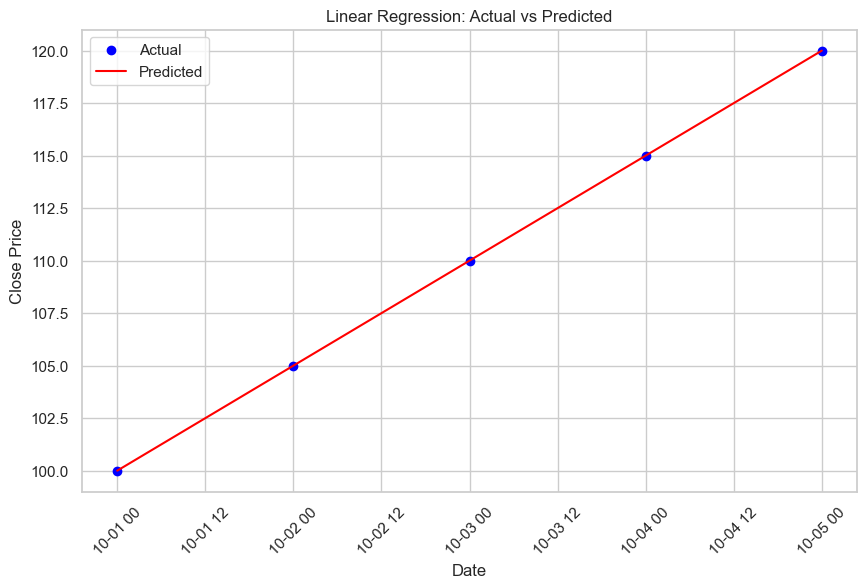

In [75]:
# Convert Unix timestamps back to dates for plotting
dates = pd.to_datetime(X_train.flatten(), unit='s')

# Ensure y_train and y_pred are 1-dimensional
y_train = y_train.flatten()
y_pred = y_pred.flatten()

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(dates, y_train, color='blue', label='Actual')

# Plot predicted values
plt.plot(dates, y_pred, color='red', label='Predicted')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Linear Regression: Actual vs Predicted')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.show()

In [77]:
m_linear.coef_

array([[5.78703704e-14]])

In [87]:
crypto_plot = combined_future_dates.hvplot.scatter(
    x="date_column",
    y="close",
    title="Expected Price"
)
crypto_plot

:Scatter   [date_column]   (close)

In [99]:
X = combined_future_dates["date_column"].values.reshape(-1, 1)
X[:5]

array([['2023-10-01T00:00:00.000000000'],
       ['2023-10-02T00:00:00.000000000'],
       ['2023-10-03T00:00:00.000000000'],
       ['2023-10-04T00:00:00.000000000'],
       ['2023-10-05T00:00:00.000000000']], dtype='datetime64[ns]')

In [103]:
X.shape
y = combined_future_dates["close"]

In [107]:
model = LinearRegression()

In [110]:
model.fit(X, y)

LinearRegression()

In [126]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Example DataFrame
combined_future_dates = pd.DataFrame({
    'date_column': pd.date_range(start='2023-10-01', periods=5),
    'close': [100, 105, 110, 115, 120]
})

# Convert datetime to Unix timestamps
X = combined_future_dates['date_column'].astype(np.int64) // 10**9  # Convert to Unix timestamps
X = X.values.reshape(-1, 1)  # Reshape for scikit-learn

# Target variable
y = combined_future_dates['close'].values

# Train the model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predicted_y_values = model.predict(X)

print("Predicted Values:", predicted_y_values)

Predicted Values: [100. 105. 110. 115. 120.]


In [129]:
# Create a copy of the original data
combined_df_predicted = combined_future_dates.copy()

# Add a column with the predicted salary values
combined_df_predicted["price_predicted"] = predicted_y_values

# Display sample data
combined_df_predicted.head()

,date_column,close,price_predicted
0,2023-10-01,100,100.0
1,2023-10-02,105,105.0
2,2023-10-03,110,110.0
3,2023-10-04,115,115.0
4,2023-10-05,120,120.0


In [132]:
best_fit_line = combined_df_predicted.hvplot.line(
    x = "date_column",
    y = "price_predicted",
    color = "red"
)
best_fit_line

:Curve   [date_column]   (price_predicted)

In [135]:
crypto_plot * best_fit_line

:Overlay
   .Scatter.I :Scatter   [date_column]   (close)
   .Curve.I   :Curve   [date_column]   (price_predicted)

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")

The score is 1.0.
The r2 is 1.0.
The mean squared error is 0.0.
The root mean squared error is 0.0.
The standard deviation is 7.0710678118654755.
